# Assignment 3 Data Analysis via Pandas

Get an experimentally informed connection matrix from from http://hippocampome.org/netlist
Or an excell spreadsheet of similar origin.

https://collab.humanbrainproject.eu/#/collab/5458/nav/42545


In [1]:
import os
import pandas as pd


# Perform some system admin

import os
import pandas as pd
import sys
import matplotlib as mpl
%matplotlib inline
mpl.rcParams.update({'font.size':16})
installs = ['neuron','mpi4py','xlrd','pyNN','seaborn','lazyarray','neo','neuron','brian2']
def install_deps(i):
  '''
  Hack in dependencies to sys.path
  '''
  import os
  if i not in sys.path:
    os.system('pip install '+str(i))    

_ = list(map(install_deps,installs))
import os
temp = os.getcwd()
os.chdir('/opt/conda/lib/python3.5/site-packages/pyNN/neuron/nmodl')
#!ls
#os.system('nrnivmodl')
!nrnivmodl
os.chdir(temp)

#import lazyarray
#import pyNN
import os
import pandas as pd



# Get some hippocampus connectivity data, based on a conversation with
# academic researchers on GH:
# https://github.com/Hippocampome-Org/GraphTheory/issues?q=is%3Aissue+is%3Aclosed
# scrape hippocamome connectivity data, that I intend to use to program neuromorphic hardware.
# conditionally get files if they don't exist.


# This connection matrix is not very informative, because it only tells you about connections dissociated From
# a stable list of cellular entities.
# path = 'netlist'
# if not os.path.exists(path):
#     os.system('wget http://hippocampome.org/netlist')
# nldf = pd.read_csv('netlist',delimiter=',').dropna()

path_xl = '_hybrid_connectivity_matrix_20171103_092033.xlsx'
if not os.path.exists(path_xl):
    os.system('wget https://github.com/Hippocampome-Org/GraphTheory/files/1657258/_hybrid_connectivity_matrix_20171103_092033.xlsx')

xl = pd.ExcelFile(path_xl)
dfEE = xl.parse()
dfEE.loc[0].keys()


import matplotlib.pyplot as plt
dfm = dfEE.as_matrix()


/opt/conda/lib/python3.5/site-packages/pyNN/neuron/nmodl
ProbAMPANMDA_EMS.mod ProbGABAAB_EMS.mod adexp.mod alphaisyn.mod alphasyn.mod expisyn.mod gammastim.mod gap.mod gif.mod gsfa_grr.mod hh_traub.mod izhikevich.mod netstim2.mod poisson_stim_refractory.mod quantal_stp.mod refrac.mod reset.mod stdwa_guetig.mod stdwa_softlimits.mod stdwa_songabbott.mod stdwa_symm.mod stdwa_vogels2011.mod stochastic_synapse.mod stochastic_tsodyksmarkram.mod tmgsyn.mod tmisyn.mod tsodyksmarkram.mod vecstim.mod
ProbAMPANMDA_EMS.mod ProbGABAAB_EMS.mod adexp.mod alphaisyn.mod alphasyn.mod expisyn.mod gammastim.mod gap.mod gif.mod gsfa_grr.mod hh_traub.mod izhikevich.mod netstim2.mod poisson_stim_refractory.mod quantal_stp.mod refrac.mod reset.mod stdwa_guetig.mod stdwa_softlimits.mod stdwa_songabbott.mod stdwa_symm.mod stdwa_vogels2011.mod stochastic_synapse.mod stochastic_tsodyksmarkram.mod tmgsyn.mod tmisyn.mod tsodyksmarkram.mod vecstim.mod
"/home/jovyan/nrn-7.4/share/nrn/libtool" --tag=CC --mode=compile 

In [2]:

filtered = dfm[:,3:]
filtered = filtered[1:]
#print(filtered[1:])

[[1 0 1 ..., 0 0 0]
 [1 1 2 ..., 0 0 0]
 [1 1 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., -1 -1 -1]
 [0 0 0 ..., -1 -1 -1]
 [0 0 0 ..., -1 -1 -1]]


In [3]:

import numpy as np
from pyNN.neuron import STDPMechanism
import copy
print(dfm)
EElist = []
IIlist = []
for i,j in enumerate(filtered):
  for k,xaxis in enumerate(j):
    if xaxis==1 or xaxis ==2:
      source = i
      target = k
      delay = 0.0
      weight = 0.1
      EElist.append((source,target,delay,weight))
        
    if xaxis==-1 or xaxis ==-2:
      source = i
      target = k
      delay = 0.0
      weight = 0.1
      IIlist.append((source,target,delay,weight))     
import matplotlib 
matplotlib.pyplot.imshow

ml = len(filtered[1])+1
plot_excit = np.zeros(shape=(ml,ml))
plot_inhib = np.zeros(shape=(ml,ml))
pre_exc = []
post_exc = []
pre_inh = []
post_inh = []
print(np.shape(plot_excit))
for i in EElist:
    plot_excit[i[0],i[1]]=1
    pre_exc.append(i[0])
    post_exc.append(i[1])
for i in IIlist:
    plot_inhib[i[0],i[1]]=1
    pre_inh.append(i[0])
    post_inh.append(i[1])

 
    

[['↓' 'UniqueID' 1000 ..., 6040 6087 6038]
 ['DG: Granule (+)2201p' 1000 0 ..., 0 0 0]
 ['DG: Hilar Ectopic Granule (+)2203p' 1041 0 ..., 0 0 0]
 ..., 
 ['EC: MEC LIII Superficial MPI (-)233000' 6040 0 ..., -1 -1 -1]
 ['EC: LIII Pyramidal-Looking (-)023300' 6087 0 ..., -1 -1 -1]
 ['EC: MEC LIII Superficial Trilayer (-)333000' 6038 0 ..., -1 -1 -1]]
(122, 122)


In [4]:

index_exc = [ i for i,d in enumerate(dfm) if '+' in d[0] ]
import pyNN.neuron as neuron
index_inh = [ i for i,d in enumerate(dfm) if '-' in d[0] ]
pop_exc = neuron.Population(len(index_exc), neuron.Izhikevich(i_offset=0))
pop_inh = neuron.Population(len(index_inh), neuron.Izhikevich(i_offset=0))


# Plot all the Projection pairs as a connection matrix (Excitatory and Inhibitory Connections)

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


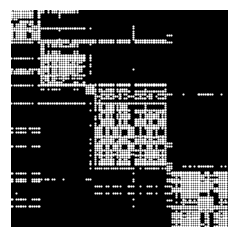

In [5]:
#sns.pairplot(df, hue="species")
from scipy.sparse import coo_matrix
m = np.matrix(filtered[1:])
if not isinstance(m, coo_matrix):
    m = coo_matrix(m)
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='black')
ax.plot(m.col, m.row, 's', color='white', ms=1)
ax.set_xlim(0, m.shape[1])
ax.set_ylim(0, m.shape[0])
ax.set_aspect('equal')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.figure.show()


# A plot of the excitatory synapse connectivity matrix


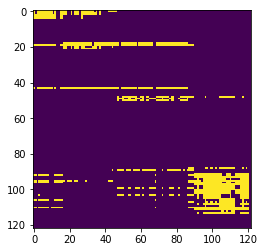

In [6]:
matplotlib.pyplot.imshow(plot_excit)   

# A plot of the inhibitory synapse connectivity matrix


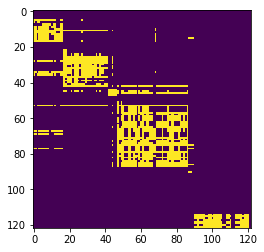

In [7]:
matplotlib.pyplot.imshow(plot_inhib)   


In [8]:
from pyNN.neuron import h
from pyNN import neuron
from pyNN.neuron import StandardCellType, ParameterSpace
#print(dir(StandardCellType))
#print(dir(ParameterSpace))


In [9]:
import pyNN
from pyNN.random import RandomDistribution, NumpyRNG

from pyNN.neuron import STDPMechanism, SpikePairRule, AdditiveWeightDependence, FromListConnector, TsodyksMarkramSynapse
from pyNN.neuron import Projection

rng = NumpyRNG(seed=64754)


weight_distr = RandomDistribution('normal', [0.01, 1e-3], rng=rng)

stdp_inhib = STDPMechanism(
          weight=weight_distr,  # this is the initial value of the weight
          delay="0.2 + 0.01*d",
          timing_dependence=SpikePairRule(tau_plus=20.0, tau_minus=20.0,
                                          A_plus=0.01, A_minus=0.012),
          weight_dependence=AdditiveWeightDependence(w_min=0, w_max=0.04))

connector = FromListConnector(IIlist, column_names=["weight", "delay"])


pop = neuron.Population(len(index_exc)+len(index_inh), neuron.Izhikevich(i_offset=0))


inhib_connections = Projection(pop, pop, connector,
                                    stdp_inhib)


print(len(IIlist),len(pop_inh))
print(dir(connector))
print(connector.conn_list)
print(connector.column_names)


2003 98
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_generate_distance_map', '_parameters_from_synapse_type', 'callback', 'column_names', 'conn_list', 'connect', 'describe', 'get_parameters', 'parameter_names', 'safe']
[[  5.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e-01]
 [  1.00000000e+01   0.00000000e+00   0.00000000e+00   1.00000000e-01]
 [  6.70000000e+01   0.00000000e+00   0.00000000e+00   1.00000000e-01]
 ..., 
 [  1.14000000e+02   1.20000000e+02   0.00000000e+00   1.00000000e-01]
 [  1.20000000e+02   1.20000000e+02   0.00000000e+00   1.00000000e-01]
 [  1.21000000e+02   1.20000000e+02   0.00000000e+00   1.00000000e-01]]
['weight', 'delay']


In [10]:

stdp = STDPMechanism(
          weight=0.02,  # this is the initial value of the weight
          delay="0.2 + 0.01*d",
          timing_dependence=SpikePairRule(tau_plus=20.0, tau_minus=20.0,
                                          A_plus=0.01, A_minus=0.012),
          weight_dependence=AdditiveWeightDependence(w_min=0, w_max=0.04))

connector = FromListConnector(EElist, column_names=["weight", "delay"])
excitatory_connections = Projection(pop, pop, connector,
                                    stdp)
print(stdp)



STDPMechanism(<parameters>)


In [17]:
##
# Setup and run a simulation. Note there is no current injection into the neuron.
# All cells in the network are in a quiescent state, so its not a surprise that there are no spikes
##
neuron.setup(timestep=1.0, min_delay=1.0)
pop.record("spikes")
neuron.run(1000)
pop.set(i_offset=1.0)
neuron.run(1000)
pop.set(i_offset=0.0)
neuron.run(1000)
spikes = pop.get_data("spikes")
neuron.end()
print(spikes)

In [11]:
#print(matrix)

#fig.show()
#plt.show()

#print(m)

#import seaborn as sns

#sns.set(style="ticks")

#df = sns.load_dataset("iris")
#sns.pairplot(m, hue="species")
#print(matrix[1][0])
#print(m[0])

Below are plots of post synaptic targets in the from an arbitary source cell in the Entorhinal cortex, to targets taht are also in the EC.

/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


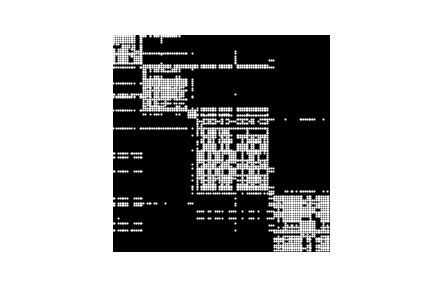

In [12]:
#m
#print(plt.backend)
ax.figure.show()
fig.savefig('connection_matrix.png')
from IPython.display import Image
Image(filename='connection_matrix.png') 
#df
#targets
#pd.DataFrame(targets).plot.hist()
#for k,v in targets.items():
#  pd.DataFrame(v).plot.hist()
#df

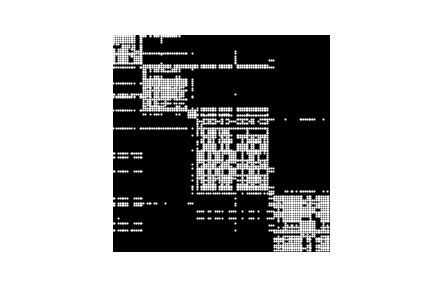

In [13]:
Image(filename='connection_matrix.png') 


In [14]:
!pip install neuron

NameError: name 'NETSIZE' is not defined

In [ ]:

#nldf['From']

#nldf.index('Granule')
#df = nldf[nldf['Name']==3]


#you'll likely need a user for authentication
#user = 'gevaert'
#server = 'http://localhost:8888'
#from bbp_client.oidc.client import BBPOIDCClient
#client = BBPOIDCClient.implicit_auth(user)
#from bbp_client.task_service.client import Client
#ts = Client(server, client)
#ts.get_tasks()
#bbp_client.register_task()
#bbp_client.start_job()



```
# This is formatted as code
```

